In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-detection-fer/test/fearful/im292.png
/kaggle/input/emotion-detection-fer/test/fearful/im1022.png
/kaggle/input/emotion-detection-fer/test/fearful/im633.png
/kaggle/input/emotion-detection-fer/test/fearful/im934.png
/kaggle/input/emotion-detection-fer/test/fearful/im927.png
/kaggle/input/emotion-detection-fer/test/fearful/im966.png
/kaggle/input/emotion-detection-fer/test/fearful/im662.png
/kaggle/input/emotion-detection-fer/test/fearful/im648.png
/kaggle/input/emotion-detection-fer/test/fearful/im178.png
/kaggle/input/emotion-detection-fer/test/fearful/im817.png
/kaggle/input/emotion-detection-fer/test/fearful/im308.png
/kaggle/input/emotion-detection-fer/test/fearful/im623.png
/kaggle/input/emotion-detection-fer/test/fearful/im651.png
/kaggle/input/emotion-detection-fer/test/fearful/im72.png
/kaggle/input/emotion-detection-fer/test/fearful/im229.png
/kaggle/input/emotion-detection-fer/test/fearful/im444.png
/kaggle/input/emotion-detection-fer/test/fearful/im415.p

In [33]:
# !pip install face_recognition

In [34]:
import os
import numpy as np
import cv2
import face_recognition
import matplotlib.pyplot as plt

In [35]:
img = cv2.imread(r'/kaggle/input/emotion-detection-fer/test/sad/im0.png')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

(48, 48, 3)


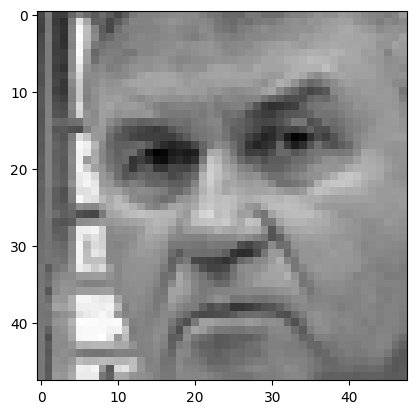

In [36]:
plt.imshow(img1, cmap='gray')

In [37]:
landmarks = face_recognition.face_landmarks(img1)[0]
print(landmarks)

{'chin': [(8, 21), (8, 26), (9, 31), (10, 35), (11, 40), (13, 44), (16, 47), (19, 48), (24, 48), (29, 48), (35, 47), (41, 45), (45, 41), (47, 35), (48, 29), (48, 23), (47, 16)], 'left_eyebrow': [(9, 17), (10, 14), (13, 13), (16, 14), (19, 14)], 'right_eyebrow': [(26, 13), (29, 11), (33, 9), (37, 9), (40, 12)], 'nose_bridge': [(22, 18), (22, 22), (21, 25), (21, 28)], 'nose_tip': [(18, 32), (20, 32), (22, 33), (25, 32), (28, 31)], 'left_eye': [(12, 21), (14, 19), (17, 18), (19, 20), (17, 21), (14, 21)], 'right_eye': [(29, 18), (31, 16), (34, 16), (37, 17), (34, 18), (31, 19)], 'top_lip': [(18, 40), (19, 38), (21, 37), (23, 38), (25, 37), (28, 37), (31, 39), (30, 39), (25, 38), (23, 39), (21, 39), (19, 40)], 'bottom_lip': [(31, 39), (29, 40), (26, 41), (24, 42), (22, 42), (20, 41), (18, 40), (19, 40), (21, 40), (23, 40), (26, 39), (30, 39)]}


In [38]:
for i, v in landmarks.items():
    print(i,v)
    for j in v:
        cv2.circle(img, j, 0, (0,255,255))
cv2.imwrite('face.jpg', img)

chin [(8, 21), (8, 26), (9, 31), (10, 35), (11, 40), (13, 44), (16, 47), (19, 48), (24, 48), (29, 48), (35, 47), (41, 45), (45, 41), (47, 35), (48, 29), (48, 23), (47, 16)]
left_eyebrow [(9, 17), (10, 14), (13, 13), (16, 14), (19, 14)]
right_eyebrow [(26, 13), (29, 11), (33, 9), (37, 9), (40, 12)]
nose_bridge [(22, 18), (22, 22), (21, 25), (21, 28)]
nose_tip [(18, 32), (20, 32), (22, 33), (25, 32), (28, 31)]
left_eye [(12, 21), (14, 19), (17, 18), (19, 20), (17, 21), (14, 21)]
right_eye [(29, 18), (31, 16), (34, 16), (37, 17), (34, 18), (31, 19)]
top_lip [(18, 40), (19, 38), (21, 37), (23, 38), (25, 37), (28, 37), (31, 39), (30, 39), (25, 38), (23, 39), (21, 39), (19, 40)]
bottom_lip [(31, 39), (29, 40), (26, 41), (24, 42), (22, 42), (20, 41), (18, 40), (19, 40), (21, 40), (23, 40), (26, 39), (30, 39)]


True

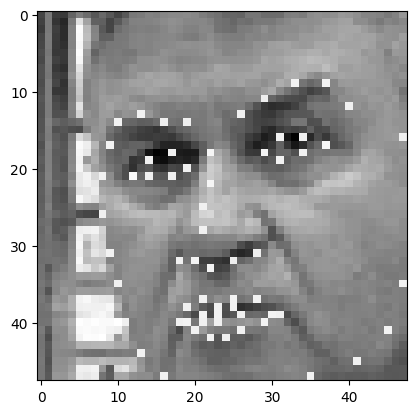

In [39]:
output = cv2.imread(r'/kaggle/working/face.jpg')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2GRAY), cmap='gray')

In [40]:
def distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x1-x2)**2 + (y1-y2)**2)**.5

In [41]:
def features(image_path):
    img = cv2.imread(image_path)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    landmarks = face_recognition.face_landmarks(img1)
    if len(landmarks) ==0:
        return 0
    else:
        landmarks = landmarks[0]
        points = []
        for i, v in landmarks.items():
            points.extend(v)
        distances = []
        for i in points:
            distances.extend([distance(i, k) for k in points])
        return distances

In [42]:
X_train, X_test, y_train, y_test = ([], [], [], [])
for dirname, _, filenames in os.walk('/kaggle/input/emotion-detection-fer/'):
    for file in filenames:
        if file.endswith('.png'):
            label = dirname.split('/')[-2]
            category = dirname.split('/')[-1]
            feat = features(os.path.join(dirname, file))
            if label == 'test':
                X_test.append([0]*5184 if feat == 0 else feat)
                y_test.append('can not say' if feat == 0 else category)
            else:
                X_train.append([0]*5184 if feat == 0 else feat)
                y_train.append('can not say' if feat == 0 else category)

In [43]:
categories = list(set(y_test))
print(categories)

['fearful', 'sad', 'disgusted', 'angry', 'can not say', 'surprised', 'happy', 'neutral']


In [44]:
def labeling(x):
    for i in range(len(x)):
        x[i] = categories.index(x[i])
    return np.array(x)

In [45]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)
y_train = labeling(y_train)
y_test = labeling(y_test)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

In [57]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(precision_score(y_test,y_pred,average='weighted'))

0.6620228475898579
[[ 126   73    1   65    0   88   76  216]
 [  67  123    3   62    0   20  107  284]
 [  11    7   12    9    0    4   19   23]
 [  48   59    3  165    0   38  133  202]
 [   0    0    0    0 2225    0    0    0]
 [  52   20    4   26    0  348   53   95]
 [  42   37    0   21    0   34 1139  109]
 [  47   97    1   60    0   27   83  614]]
              precision    recall  f1-score   support

           0       0.32      0.20      0.24       645
           1       0.30      0.18      0.23       666
           2       0.50      0.14      0.22        85
           3       0.40      0.25      0.31       648
           4       1.00      1.00      1.00      2225
           5       0.62      0.58      0.60       598
           6       0.71      0.82      0.76      1382
           7       0.40      0.66      0.50       929

    accuracy                           0.66      7178
   macro avg       0.53      0.48      0.48      7178
weighted avg       0.65      0.66      0

**Acheived 66.20% Accuracy In KNN**

In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(precision_score(y_test,y_pred,average='weighted'))

0.6316522708275285
[[ 196   76   14   84    0   75   74  126]
 [  80  162   17  104    0   40   91  172]
 [   8   10   31   13    0    4    8   11]
 [  94  100   15  205    0   56   88   90]
 [   0    0    0    0 2225    0    0    0]
 [  56   40    3   32    0  392   35   40]
 [  81   85    3   93    0   54  954  112]
 [ 122  169    7  110    1   43  108  369]]
              precision    recall  f1-score   support

           0       0.31      0.30      0.31       645
           1       0.25      0.24      0.25       666
           2       0.34      0.36      0.35        85
           3       0.32      0.32      0.32       648
           4       1.00      1.00      1.00      2225
           5       0.59      0.66      0.62       598
           6       0.70      0.69      0.70      1382
           7       0.40      0.40      0.40       929

    accuracy                           0.63      7178
   macro avg       0.49      0.50      0.49      7178
weighted avg       0.63      0.63      0

**Acheived 63.1% Acurracy In DecisionTree**

In [59]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)
y_pred5 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5,average='weighted'))

0.7078573418779605
[[ 179   74    0   72    0   78   82  160]
 [  38  162    0   81    0   18   97  270]
 [   9   11   27   13    0    4   11   10]
 [  42   73    0  252    0   23  104  154]
 [   0    0    0    0 2225    0    0    0]
 [  41    9    0   23    0  421   57   47]
 [  26   31    0   28    0   19 1189   89]
 [  34  106    0   64    0   20   79  626]]
0.7016492555548609


**Acheived 70.78% Acurracy In RandomForest**

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

2024-06-13 10:51:15.687615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-13 10:51:15.687776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-13 10:51:15.957193: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [61]:
# number of classes
num_classes = 8
# input shape of features
input_shape = (5184,)

In [62]:
from keras.utils import to_categorical

# convert the target variables to one-hot encoded format
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**Using 4 layer ANN**

In [63]:
# define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=input_shape),
    Dense(216, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
# define the optimizer with learning rate
opt = Adam(learning_rate=0.0001)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
# compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [65]:
# train the model
model.fit(X_train, y_train, batch_size=64, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
 54/449 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3987 - loss: 4.9602

I0000 00:00:1718276130.967592    3752 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718276130.983900    3752 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5181 - loss: 2.4640

W0000 00:00:1718276133.691176    3752 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718276134.468640    3749 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


449/449 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5182 - loss: 2.4623 - val_accuracy: 0.6346 - val_loss: 1.0270
Epoch 2/150
 50/449 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6171 - loss: 1.0636

W0000 00:00:1718276135.183364    3749 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5980 - loss: 1.1105 - val_accuracy: 0.6505 - val_loss: 0.9866
Epoch 3/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6160 - loss: 1.0503 - val_accuracy: 0.6156 - val_loss: 0.9768
Epoch 4/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6174 - loss: 1.0489 - val_accuracy: 0.6591 - val_loss: 0.9716
Epoch 5/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6284 - loss: 1.0065 - val_accuracy: 0.6076 - val_loss: 1.0005
Epoch 6/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6347 - loss: 0.9832 - val_accuracy: 0.6137 - val_loss: 0.9892
Epoch 7/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6320 - loss: 0.9832 - val_accuracy: 0.6439 - val_loss: 0.9494
Epoch 8/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6343 - loss: 0.9779 - val_accuracy: 0.6414 - val_loss: 0.9622
Epoch 9/150
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6386 - loss: 0.9679 - val_accuracy: 0.6367

**Got Maximum 70% Accuracy Usinf 4 Layer ANN**